In [2]:
!ls /Users/spx8sk/work/data/

NRHybSur3dq8.h5          SXS_BBH_0188_Res3.h5     SXS_BBH_0296_Res4.h5
NRSur7dq4.h5             SXS_BBH_0192_Res2.h5     SXS_BBH_0296_Res5.h5
SXS_BBH_0030_Res3.h5     SXS_BBH_0192_Res3.h5     SXS_BBH_0298_Res3.h5
SXS_BBH_0030_Res4.h5     SXS_BBH_0193_Res2.h5     SXS_BBH_0298_Res4.h5
SXS_BBH_0030_Res5.h5     SXS_BBH_0193_Res3.h5     SXS_BBH_0298_Res5.h5
SXS_BBH_0107_Res3.h5     SXS_BBH_0194_Res2.h5     SXS_BBH_0300_Res3.h5
SXS_BBH_0107_Res4.h5     SXS_BBH_0194_Res3.h5     SXS_BBH_0300_Res4.h5
SXS_BBH_0107_Res5.h5     SXS_BBH_0196_Res2.h5     SXS_BBH_0300_Res5.h5
SXS_BBH_0166_Res5.h5     SXS_BBH_0196_Res3.h5     SXS_BBH_0301_Res3.h5
SXS_BBH_0167_Res3.h5     SXS_BBH_0198_Res1.h5     SXS_BBH_0301_Res4.h5
SXS_BBH_0167_Res5.h5     SXS_BBH_0198_Res2.h5     SXS_BBH_0301_Res5.h5
SXS_BBH_0169_Res3.h5     SXS_BBH_0198_Res3.h5     SXS_BBH_0302_Res3.h5
SXS_BBH_0169_Res4.h5     SXS_BBH_0198_Res4.h5     SXS_BBH_0302_Res4.h5
SXS_BBH_0169_Res5.h5     SXS_BBH_0198_Res5.h5     SXS_BBH_0302_Res5.h5
SXS_BB

In [3]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
matplotlib.rcParams.update({'font.size': 16})

import numpy as np
import os
import glob
import copy

In [4]:
from scrinet.interfaces import lalutils

import lal
import lalsimulation as lalsim

import utils


In [5]:
from scipy.interpolate import InterpolatedUnivariateSpline as IUS 

In [6]:
import glob
import os

In [16]:
def make_nr_dict():
    """
    makes a dictionary of paths to NR files
    with multiple resolutions
    """
    root_dir = "/Users/spx8sk/work/data/"
    nr_ids = dict(q1="180", q2="169", q3="0030", q3p5="0294", q4="167", q4p5="0295", q5="107", q9="0301", q9p5="0302", q10="303")

    nrfiles = {}

    for key, val in nr_ids.items():
        ps = glob.glob(os.path.join(root_dir, "*" + val + "*.h5"))

        nrfiles.update({key: {}})
        for p in ps:
            k = p.split("/")[-1].split(".h5")[0].split("_")[-1]
            nrfiles[key].update({k: p})

    return nrfiles

In [18]:
nrfiles = make_nr_dict() 

In [20]:
nrfiles

{'q1': {'Res4': '/Users/spx8sk/work/data/SXS_BBH_0180_Res4.h5',
  'Res3': '/Users/spx8sk/work/data/SXS_BBH_0180_Res3.h5',
  'Res2': '/Users/spx8sk/work/data/SXS_BBH_0180_Res2.h5'},
 'q2': {'Res3': '/Users/spx8sk/work/data/SXS_BBH_0169_Res3.h5',
  'Res5': '/Users/spx8sk/work/data/SXS_BBH_0169_Res5.h5',
  'Res4': '/Users/spx8sk/work/data/SXS_BBH_0169_Res4.h5'},
 'q3': {'Res5': '/Users/spx8sk/work/data/SXS_BBH_0030_Res5.h5',
  'Res4': '/Users/spx8sk/work/data/SXS_BBH_0030_Res4.h5',
  'Res3': '/Users/spx8sk/work/data/SXS_BBH_0030_Res3.h5'},
 'q3p5': {'Res4': '/Users/spx8sk/work/data/SXS_BBH_0294_Res4.h5',
  'Res3': '/Users/spx8sk/work/data/SXS_BBH_0294_Res3.h5'},
 'q4': {'Res5': '/Users/spx8sk/work/data/SXS_BBH_0167_Res5.h5',
  'Res3': '/Users/spx8sk/work/data/SXS_BBH_0167_Res3.h5'},
 'q4p5': {'Res4': '/Users/spx8sk/work/data/SXS_BBH_0295_Res4.h5',
  'Res5': '/Users/spx8sk/work/data/SXS_BBH_0295_Res5.h5',
  'Res3': '/Users/spx8sk/work/data/SXS_BBH_0295_Res3.h5'},
 'q5': {'Res4': '/Users/sp

In [197]:
 # get data
nrfiles_single_res = {
    "q_1.0":"/Users/spx8sk/work/data/SXS_BBH_0180_Res4.h5",
    "q_2.0":"/Users/spx8sk/work/data/SXS_BBH_0169_Res5.h5",
    "q_3.0":'/Users/spx8sk/work/data/SXS_BBH_0030_Res5.h5',
    "q_3.5":'/Users/spx8sk/work/data/SXS_BBH_0294_Res4.h5',
    "q_4.0":"/Users/spx8sk/work/data/SXS_BBH_0167_Res5.h5",
    "q_4.5":'/Users/spx8sk/work/data/SXS_BBH_0295_Res5.h5',
    "q_5.0":"/Users/spx8sk/work/data/SXS_BBH_0107_Res5.h5",
    "q_9.0":'/Users/spx8sk/work/data/SXS_BBH_0301_Res5.h5',
    "q_9.5":'/Users/spx8sk/work/data/SXS_BBH_0302_Res5.h5',
    "q_10.0":"/Users/spx8sk/work/data/SXS_BBH_0303_Res5.h5",
#     "q_18":"/Users/spx8sk/work/git/stk/ml/waveforms/bob/q18a0a0c025_144-22-hybrid.h5"
}

In [199]:
nr_q_arr = np.array([float(q.split('q_')[-1]) for q in nrfiles_single_res.keys()]) 

In [200]:
nr_q_arr

array([ 1. ,  2. ,  3. ,  3.5,  4. ,  4.5,  5. ,  9. ,  9.5, 10. ])

In [201]:
def gen_model_waveforms(approx, qlist, npts, t_max, nrfiles=None):
    if approx == "NR":
        return [utils.WaveformGeneration(nrfile=nrfiles[key], npts=npts, t_max=t_max) for key in nrfiles]
    else:
        lal_approx = lalsim.GetApproximantFromString(approx)
        return [utils.WaveformGeneration(approximant=lal_approx, q=q, npts=npts, t_max=t_max) for q in qlist]

In [202]:
def make_training_set(wfs, attr):
    """
    make a numpy array of training data
    """
    x = np.array([wf.__getattribute__('q') for wf in wfs])
    y = np.array([wf.__getattribute__(attr) for wf in wfs])
    return {'x':x, 'y':y}

In [203]:
approxs = ["NR"]

# time points
npts=1000
t_min=-1000
t_max=100

# data_to_model = 'amp'
# data_to_model = 'phase'
# data_to_model = 'freq'

In [204]:
model_wfs = {}
for approx in approxs:
    model_wfs.update({approx:gen_model_waveforms(approx, None, npts, t_max=t_max, nrfiles=nrfiles_single_res)})

In [205]:
model_wfs

{'NR': [<utils.WaveformGeneration at 0xb3ff987d0>,
  <utils.WaveformGeneration at 0xb3ff98d10>]}

In [206]:
data_to_model = 'amp'
training_set_amp = {}
for approx in approxs:
    training_set_amp.update({approx:make_training_set(model_wfs[approx], data_to_model)})
    
data_to_model = 'phase'
training_set_phase = {}
for approx in approxs:
    training_set_phase.update({approx:make_training_set(model_wfs[approx], data_to_model)})
    
data_to_model = 'freq'
training_set_freq = {}
for approx in approxs:
    training_set_freq.update({approx:make_training_set(model_wfs[approx], data_to_model)})

In [207]:
common_times = model_wfs['NR'][0].times

In [208]:
training_set_amp['NR']

{'x': array([ 1. ,  2. ,  3. ,  3.5,  4. ,  4.5,  5. ,  9. ,  9.5, 10. ]),
 'y': array([[1.13429536e-01, 1.13456577e-01, 1.13483801e-01, ...,
         2.90587144e-04, 2.37076777e-04, 1.75062648e-04],
        [1.02885148e-01, 1.02900268e-01, 1.02914936e-01, ...,
         1.57670447e-04, 2.93487392e-04, 2.74168690e-04],
        [8.91334286e-02, 8.91570985e-02, 8.91802065e-02, ...,
         8.03535152e-05, 1.36529023e-04, 2.13802928e-04],
        ...,
        [4.83256258e-02, 4.83365256e-02, 4.83460220e-02, ...,
         6.05344918e-05, 1.16491039e-04, 1.28245771e-04],
        [4.65482128e-02, 4.65493531e-02, 4.65500992e-02, ...,
         1.59592856e-04, 1.37217934e-04, 9.49109242e-05],
        [4.48888085e-02, 4.48885629e-02, 4.48886289e-02, ...,
         1.01682629e-04, 5.00643725e-05, 2.31542333e-05]])}

(-100, 100)

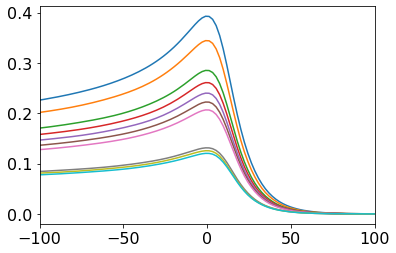

In [209]:
plt.figure()
for i in range(len(model_wfs["NR"])):
    plt.plot(common_times, training_set_amp['NR']['y'][i])
plt.xlim(-100, 100)

(-100, 100)

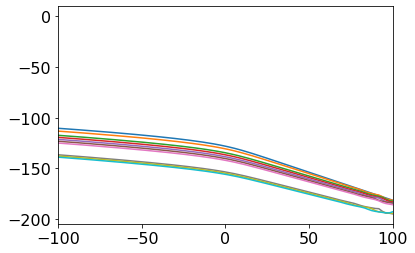

In [210]:
plt.figure()
for i in range(len(model_wfs["NR"])):
    plt.plot(common_times, training_set_phase['NR']['y'][i])
plt.xlim(-100, 100)

(-0.65, 0)

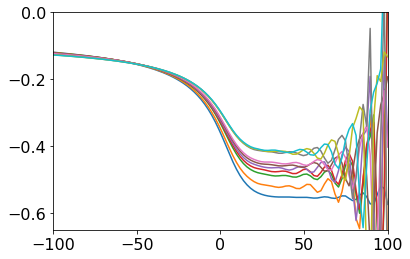

In [211]:
plt.figure()
for i in range(len(model_wfs["NR"])):
    plt.plot(common_times, training_set_freq['NR']['y'][i])
plt.xlim(-100, 100)
plt.ylim(-0.65, 0)

In [212]:
training_data_keys = ['q_1.0', 'q_3.0', 'q_4.0', 'q_4.5', 'q_5.0', 'q_9.0', 'q_9.5']

train_outdir = "PXT904_training_data"
val_outdir = "PXT904_validation_data"
os.makedirs(train_outdir, exist_ok=True)
os.makedirs(val_outdir, exist_ok=True)
for i, q_key in enumerate(nrfiles_single_res.keys()):

    if q_key in training_data_keys:
        file_name = f"{train_outdir}/{q_key}.txt"
    else:
        file_name = f"{val_outdir}/{q_key}.txt"
        
    print(file_name)
    
    amp = training_set_amp['NR']['y'][i]
    phase = training_set_phase['NR']['y'][i]
    freq = training_set_freq['NR']['y'][i]
    np.savetxt(file_name, np.column_stack((common_times, amp, phase, freq)))

PXT904_training_data/q_1.0.txt
PXT904_validation_data/q_2.0.txt
PXT904_training_data/q_3.0.txt
PXT904_validation_data/q_3.5.txt
PXT904_training_data/q_4.0.txt
PXT904_training_data/q_4.5.txt
PXT904_training_data/q_5.0.txt
PXT904_training_data/q_9.0.txt
PXT904_training_data/q_9.5.txt
PXT904_validation_data/q_10.0.txt


In [213]:
!head PXT904_validation_data/q2.0.txt

head: PXT904_validation_data/q2.0.txt: No such file or directory


In [215]:
test_load = np.loadtxt("PXT904_validation_data/q_2.0.txt")

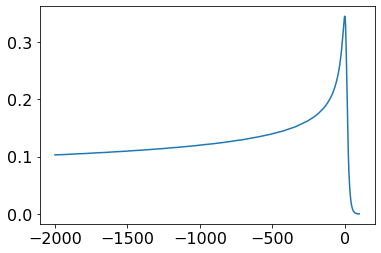

In [216]:
plt.plot(test_load[:,0], test_load[:, 1])

In [217]:
ts_fnames = glob.glob("PXT904_training_data/*.txt")
val_fnames = glob.glob("PXT904_validation_data/*.txt")

In [218]:
print(ts_fnames)
print(len(ts_fnames))

['PXT904_training_data/q_9.0.txt', 'PXT904_training_data/q_9.5.txt', 'PXT904_training_data/q_1.0.txt', 'PXT904_training_data/q_3.0.txt', 'PXT904_training_data/q_5.0.txt', 'PXT904_training_data/q_4.5.txt', 'PXT904_training_data/q_4.0.txt']
7


In [219]:
print(val_fnames)
print(len(val_fnames))

['PXT904_validation_data/q_3.5.txt', 'PXT904_validation_data/q_2.0.txt', 'PXT904_validation_data/q_10.0.txt']
3


In [229]:
def load_and_plot_data(fnames):
    datas = np.asarray([np.loadtxt(fn) for fn in fnames])
    for i in range(len(fnames)):
        plt.plot(datas[i,:,0], datas[i,:,3], label=fnames[i].split("q_")[-1].split(".txt")[0])
    plt.legend()

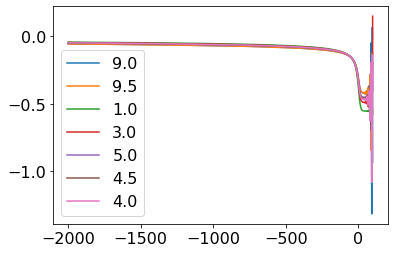

In [230]:
load_and_plot_data(ts_fnames)

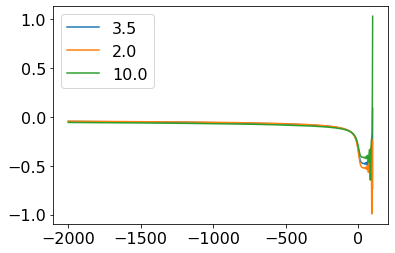

In [231]:
load_and_plot_data(val_fnames)